<a href="https://colab.research.google.com/github/luutienphat19146233/phan-loai-trai-cay/blob/main/CNN_TRAICAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

# Chuyển đến file Google Drive chứa bộ ảnh đã tạo
%cd"/content/drive/MyDrive/BaitapAI/tuan14/Trai cay"

/content/drive/MyDrive/BaitapAI/tuan14/Trai cay


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/BaitapAI/tuan14/Trai cay/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 500 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu validation set
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/BaitapAI/tuan14/Trai cay/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 100 images belonging to 10 classes.


In [ ]:
#các nhãn có trong bộ dữ liệu train
training_set.class_indices



{'bơ': 0,
 'bưởi': 1,
 'chôm chôm': 2,
 'dừa': 3,
 'măng cụt': 4,
 'mận hà nội': 5,
 'sầu riêng': 6,
 'thanh long': 7,
 'vải thiều': 8,
 'vú sữa': 9}

In [ ]:
#các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'bơ': 0,
 'bưởi': 1,
 'chôm chôm': 2,
 'dừa': 3,
 'măng cụt': 4,
 'mận hà nội': 5,
 'sầu riêng': 6,
 'thanh long': 7,
 'vải thiều': 8,
 'vú sữa': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/100
16/16 [==============================] - 138s 8s/step - loss: 4.3405 - accuracy: 0.0940 - val_loss: 2.2783 - val_accuracy: 0.2200
Epoch 2/100
16/16 [==============================] - 4s 262ms/step - loss: 2.2130 - accuracy: 0.1800 - val_loss: 2.0084 - val_accuracy: 0.3000
Epoch 3/100
16/16 [==============================] - 4s 267ms/step - loss: 2.0207 - accuracy: 0.1980 - val_loss: 1.9902 - val_accuracy: 0.2400
Epoch 4/100
16/16 [==============================] - 4s 265ms/step - loss: 1.9211 - accuracy: 0.2500 - val_loss: 1.6852 - val_accuracy: 0.4000
Epoch 5/100
16/16 [==============================] - 4s 265ms/step - loss: 1.6964 - accuracy: 0.3860 - val_loss: 1.4797 - val_accuracy: 0.4300
Epoch 6/100
16/16 [==============================] - 4s 264ms/step - loss: 1.5918 - accuracy: 0.4300 - val_loss: 1.4164 - val_accuracy: 0.4500
Epoch 7/100
16/16 [==============================] - 4s 271ms/step - loss: 1.4621 - accuracy: 0.4900 - val_loss: 1.0304 - val_accuracy: 0.6900


In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

NameError: ignored

<function matplotlib.pyplot.show>

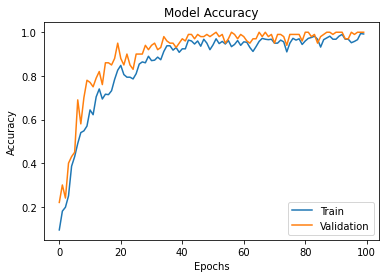

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epochs') 
plt.legend(['Train','Validation']) 
plt.show

vú sữa


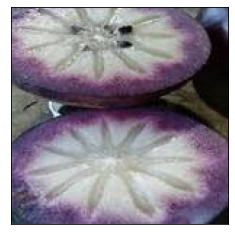

In [ ]:
name=['bơ',
 'bưởi',
 'chôm chôm',
 'dừa',
 'măng cụt',
 'mận hà nội',
 'sầu riêng',
 'thanh long',
 'vải thiều',
 'vú sữa']
url='/content/images (4).jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])

sầu riêng


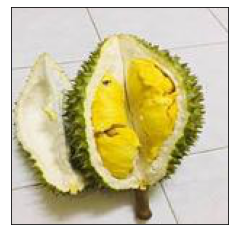

In [ ]:
url='/content/images (1).jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])

In [ ]:
url='/content/tải xuống (11).jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])

NameError: ignored